# Algoritmos de optimización - Seminario<br>
**Nombre y Apellidos:** Maria Teresa Gilabert Ramón  <br>
**Url**: https://github.com/maitegr1505/03MAIR-Algoritmos-de-Optimizacion/blob/main/Seminario_AlgoritmosOptimizaci%C3%B3n_MaiteGilabert.ipynb<br>
**Problema:**

>3. Combinar cifras y operaciones

**Descripción del problema:**

*Disponemos de las 9 cifras del 1 al 9 (excluimos el 0) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) *y división(/)*. 

*Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo para obtener el 4 sería: *4+2-6/3*1=4*. 

*Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones: 
*- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores posibles entre dicho máximo y mínimo?

*Nota: Es posible usar la función de pyhton "eval" para evaluar una expresión.*

(*) La respuesta es obligatoria  

Según el enunciado del problema y el ejemplo dado, se va a elaborar un algoritmo que calcule todas las combinaciones posibles de números enteros situados entre 1 y 9, sin repetir ninguno de ellos, de manera que siempre se cumpla la siguiente fórmula matemática: 

$a+b-c/d*e$

Siendo **a, b, c, d y e**, los números enteros buscados. 

Más ejemplos a obtener para varios números enteros de los disponibles serían los siguientes: 

$1+6-9/3*2=1$

$2+8-6/3*4=2$

$3+2-8/4*1=3$

$4+2-6/3*1=4$

$5+4-8/2*1=5$

**(...)**

Tal y como se ve, obtener todas las combinaciones posibles de números enteros siguiendo las indicaciones del enunciado, resulta ser una función de cálculo tediosa si se realiza manualmente, ya que además, para un mismo dato de entrada se puede obtener más de una combinación diferente.


## Pregunta 1. 
**(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**<br>

Si no se tienen en cuenta las restricciones del problema, se pueden obtener combinaciones sin importar si ocurre alguno de los siguientes casos: 
- Usar y/o combinar números enteros, naturales, reales, racionales...
- Repetir valores y operaciones aritméticas.
- Usar un rango infinito de valores.

Por tanto, para el ejemplo expuesto en el enunciado donde se pretendía obtener una combinación que resuelva el número 4, se podría hacer de las siguientes formas:
- $4=1*4*4/16$
- $4=1+1+1+1$
- $4=16-8-4$
- $4=200/10-1.5-8.5-6$

Tal y como se puede observar, el espacio de soluciones es inmensamente grande dado que la búsqueda de soluciones no se encuentra acotada por ninguna condición o limitación, por tanto, existe una gran cantidad de soluciones posibles, pudiéndose considerar prácticamente infinitas.  

**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?**

Las combinaciones de cifras y operaciones deben de cumplir con las siguientes restricciones: 
- Deben estar compuestas por los siguientes números enteros: **1, 2, 3, 4, 5, 6, 7, 8, 9**.
- Deben de estar formadas por las siguientes operaciones fundamentales: **suma (+), resta (-), multiplicación (x), división (/)**. 
- No se pueden repetir ni los números enteros ni las operaciones utilizadas. 
- Debe de cumplirse la siguiente fórmula matemática para obtener: $a+b-c/d*e=a$

Debido a las restricciones impuestas, el espacio de posibles soluciones es reducido considerablemente, aún así, no es posible especificar cuántas soluciones se podrán obtener, dado que dependiendo del valor de entrada a considerar, se obtendrá un cierto número de soluciones.

## Pregunta 2. 
**Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Arguméntalo.
(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguméntalo)**


Los datos a tener en cuenta para el planteamiento y resolución del problema son los siguientes:

- DATOS DE ENTRADA. Una lista de los valores a tener en cuenta (del 1 al 9). Una forma de representar dichos datos sería mediante una lista que comprenda cada uno de los valores posibles [1,2,3,4,5,6,7,8,9]. Además, como dato de entrada se considerará un valor entero comprendido entre dicho rango del cual se quieren obtener soluciones, el cual simplemente se tratará como una variable de tipo entero. 


- DATOS DE SALIDA. Por cada una de las soluciones encontradas para un caso dado, se obtendrán una serie de valores por cada una de las soluciones obtenidas (a,b,c,d,e). En principio, una forma de representar las soluciones sería mediante una matriz de datos donde cada fila represente una solución [a,b,c,d,e] y cada columna cada uno de los valores que forman dicha solución, pero finalmente se ha decidido utilizar *DataFrames* de tipo Pandas, librería comúnmente utilizada en el tratamiento de datos en lenguaje Python, para formar una tabla que agrupe todas las soluciones de la misma forma que se haría si se utilizaran matrices, estructurando los datos mediante filas y columnas. La tabla de salida presentaría la siguiente forma:

In [1]:
import pandas as pd
from pandas import DataFrame 

tabla = pd.DataFrame(index =['1','2','3','4','5','6','(...)'],columns=['a', 'b', 'c', 'd', 'e'])
display(tabla)

,a,b,c,d,e
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
(...),NaN,NaN,NaN,NaN,NaN


## Pregunta 3.
**Según el modelo para el espacio de soluciones**<br>
**(*)¿Cual es la función objetivo?**

**(*)¿Es un problema de maximización o minimización?**

La función objetivo del problema a considerar, consiste en encontrar todas las posibles soluciones para un valor de entrada dado teniendo en cuenta ciertas restricciones, por lo que no se trata de un problema de maximización o minimización, sino más bien de optimización. 

## Pregunta 4
**Diseña un algoritmo para resolver el problema por fuerza bruta**

El algoritmo por fuerza bruta consisitirá en probar todas las combinaciones posibles formadas por series de 5 números enteros, donde cada cifra podrá valer entre 1 y 9, ambos incluídos.

Se ha creado una función, la cual identificaremos como **algoritmo_fuerza_bruta()**, y que requerirá como parámetros de entrada un número entero y una lista de números enteros a tener en cuenta. Para encontrar todas las combinaciones posibles, se utilizarán bucles **for()**, una por cada cifra a resolver, de tamaño igual a la lista de valores posibles a tener en cuenta. Después de obtener una combinación, se comprobará si cumplen con la condición de que las cifras son diferentes entre ellas, y que se resuelve la ecuación $a+b-c/d*e=a$. No obstante, en el código se comprueba realmente si $b=c/d*e$ y si el resto de la división de $c*e$ entre $d$ es 0, dado que de este modo funcionaba mejor y daba resultados correctamente, cosa que no ocurría si se calculaba directamente la ecuación completa. Todas las combinaciones encontradas que sean solución, serán almacendas en un *DataFrame* de tipo Pandas, y se devolverá como salida de la función. De este modo, será posible representar los datos posteriormente en tablas. 

A continuación, se muestra el código Pyhton implementado, junto con una serie de comentarios para comprender mejor el proceso. 

In [2]:
def algoritmo_fuerza_bruta (num, valores):
    
    #Declarar variables de salida
    tabla_comb = pd.DataFrame() #Almacenar combinaciones
    
    #1. Asignar valor a "a"
    a = num
    
    #2. Asignar valor a "b"
    for val_b in valores:
        b = val_b
            
        #3. Asignar valor a "c"
        for val_c in valores:
            c = val_c
                     
            #4. Asignar valor a "d"
            for val_d in valores:
                d=val_d
                            
                #5. Asignar valor a "e"
                for val_e in valores:
                    e=val_e
                                    
                    #6. Comprobar si son combinación
                    #a) Si los números son diferentes entre sí 
                    if a!=b and a!=c and a!=d and a!=e and b!=c and b!=d and b!=e and c!=d and c!=e and d!=e:
        
                        #b) Si resuleven la condición a+b-c/d*e==a
                        if int(c/d*e)==b and (c*e)%d==0:
                            #Almacenar combinación
                            tabla_comb = tabla_comb.append({'a':a, 'b':b, 'c':c, 'd':d, 'e':e}, ignore_index=True)
                            
    return tabla_comb

## Pregunta 5
**Calcula la complejidad del algoritmo por fuerza bruta**

La complejidad del algoritmo vendrá determinada por el tamaño de entrada, que tal y como se ha explicado anteriormente,  está compuesto por un número entero y una lista de valores de un cierto tamaño, al cual nos referiremos como tamaño **n**. En este caso, la lista de valores siempre tendrá el mismo tamaño dado que se trata de uno de los requisitos del problema, pero se ha decidido considerarla como variable de entrada para que sirva como forma de evaluar la complejidad del algoritmo. 

El algoritmo implementado ejecuta una serie de bucles **for** anidados, en concreto cuatro, cada uno de ellos de tamaño n, que por tanto dependen del tamaño de entrada. Los demás elementos del código como los condicionales **if()** y la asignación de variables introducirían una complejidad constante. Por tanto, se determinará que el algoritmo posee un orden de complejidad $O(n^4)$, debido a los cuatro bucles en cascada de tamaño n. 

## Pregunta 6
**(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta**

Para optimizar el algoritmo elaborado por fuerza bruta y así conseguir reducir su complejidad, se podría aplicar aplicar la técnica de "Vuelta atrás" o "*Backtracking*" debido a los siguientes motivos: 
- Se puede identificar el problema como una sucesión de fases, obteniéndose en cada una una de ellas uno de los valores buscados ($a,b,c,d,e$). 
- El problema se podría implementar en forma de *Árbol de expansión*, de modo que irían construyéndose las soluciones a medida que se avanza por el árbol, hasta llegar al nodo final y verificar si se trata de una solución válida (una de las combinaciones buscadas). De no ser así, se descartaría la solución y se volvería hacia atrás, hacia el nodo que permita continuar con la búsqueda de soluciones. 

En el siguiente esquema se presenta un ejemplo de una de las ramas que formarían parte del árbol, donde se van escogiendo cada uno de los número enteros, sin repetir ninguno de ellos, hasta llegar al final donde se comprueba si es una solución (ver nodos y aristas pintadas de rojo). Como en este caso, no se trata de una solución, se volvería al nodo anterior para escoger otro valor, y así sucesivamente.  

https://github.com/maitegr1505/03MAIR-Algoritmos-de-Optimizacion/blob/main/Arbol.PNG

- Cada etapa podría identificarse como un nodo, y los hijos de cada nodo como nuevas partes de la solución para la siguiente etapa. 
- Se pretende obtener todas las posibles soluciones. 

Teniendo en cuenta que la técnica de Vuelta atrás comprende cada una de las condiciones aportadas, se considerará válido para la obtención de soluciones al problema. 

A continuación, se mostrará un esquema gráfico del modelo sobre el que se apoya el algoritmo diseñado para el presente problema, y que sirve para un mejor entendimiento del código realizado. 

https://github.com/maitegr1505/03MAIR-Algoritmos-de-Optimizacion/blob/main/Esquema_etapas.PNG

Por tanto, el algoritmo se basa en la ejecución de 6 fases, primero se asigna un valor a **a** (etapa 1), a continuación a **b** (etapa 2), después a **c** (etapa 3), a **d** (etapa 4), y por último a **e** (etapa 5). A continuación (etapa 6), se comprueba si esos elementos forman la combinación buscada calculando si $c/d*e=b$, ya que en la operación $a+b-c/d*e$ implica que el conjunto $b-c/d$ debe ser igual a $b$ para que se cancelen y quede solo $a$. Además, se comprueba si el resto de la división $c*e$ entre $d$ es nulo, lo cual significará que el resultado es un número entero. Si se cumple, se guarda la combinación ya que se ha encontrado una solución.

La forma de continuar con la ejecución del algoritmo es la de volver a la etapa 5, tanto si se ha encontrado solución como si no, para así asginar otro valor a **e**, y comprobar si se trata de otra combinación posible. Cuando se hayan probado con todos los valores que se pueden asignar a **e**, se retrocederá a la etapa 4 para asignar otro valor a **d**, y volver a la etapa 5 para probar con todos los posibles valores de **e**. Cuando se hayan probado todos los posibles valores de **d**, se volverá a la etapa 3 para asignar otro valor a **c**, y lo mismo con **b**, también llegará el momento de volver a la etapa 2 y probar con todos los valores posibles. Es de destacar que en cada etapa, no se evalúan valores ya asignados por las etapas anteriores, lo cual aportará un grado de optimización comparado con el algoritmo de fuerza bruta. 

Una vez explicado cómo se va a ejecutar el algoritmo, se procede a la presentación del código elaborado para tal fin. Se trata de una función que recibe los mismos parámetros de entrada que el de fuerza bruta, y devuelve el mismo objeto de salida.


In [3]:
def algoritmo_backtracking (num, valores):

    tabla_comb = pd.DataFrame() #Almacenar combinaciones
    
    #Etapa 1. Asignar valor a "a"
    a = num
    
    #Etapa 2. Asignar valor a "b"
    for val_b in valores:
        
        if val_b not in [a]: #Comprobar que no se repite valor
            b = val_b
            
            #Etapa 3. Asignar valor a "c"
            for val_c in valores:
                
                if val_c not in [a,b]: #Comprobar que no se repite valor
                    c = val_c
                    
                    #Etapa 4. Asignar valor a "d"
                    for val_d in valores:
                        
                        if val_d not in [a,b,c]: #Comprobar que no se repite valor
                            d=val_d
                            
                            #Etapa 5. Asignar valor a "e"
                            for val_e in valores:
                                
                                if val_e not in [a,b,c,d]: #Comprobar que no se repite valor
                                    e=val_e
                                    
                                    #Etapa 6. Comprobar si son combinación
                                    if int(c/d*e)==b and (c*e)%d==0:
                                        #Almacenar combinación
                                        tabla_comb = tabla_comb.append({'a':a, 'b':b, 'c':c, 'd':d, 'e':e}, ignore_index=True)
    return tabla_comb

## Pregunta 7
**(*)Calcula la complejidad del algoritmo**

El orden de complejidad del algoritmo diseñado también vendrá determinado por el tamaño de entrada, y a su vez, por los bucles **for()** utilizados. No obstante, tal y como se ha explicado, si un valor es asignado a una de las cifras resultado, en los bucles posteriores no se utilizará ese valor, sino, el siguiente disponible. Esto permite reducir la complejidad dado que al final solo se comprobará el resultado de combinar cifras diferentes entre ellas. Por tanto, el orden de complejidad será calculado por la complejidad añadida en cada bucle: $O(n-1)*O(n-2)*O(n-3)*O(n-4)$. Esto daría como resultado $O(n^4-10n^3+35n^2-50n+24)$

Se trata de una complejidad polinómica, del mismo modo que en el caso del algoritmo por fuerza bruta, con la diferencia de que para tamaños de entrada muy grandes, el algoritmo optmizado funcionaría mejor en términos de complejidad. El siguiente gráfico demuestra que conforme aumenta el tamaño de entra **n**, la complejidad del algoritmo optimizado es menor que el de fuerza bruta. Esto ocurriría en el caso de que se decidiera modificar la restricción de los valores enteros disponibles y aumentar su tamaño considerablemente.  

In [4]:
# importar matplotlib
import matplotlib.pyplot as plt

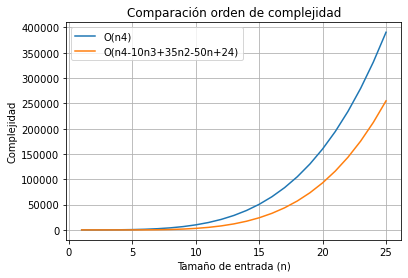

In [5]:
#Tamaño de entrada n
n = list(range(1,26,1))

#Orden de complejidad O(n^4) para algoritmo por fuerza bruta
O_fuerza_bruta = [i ** 4 for i in n]

#Orden de complejidad O(𝑛4−10𝑛3+35𝑛2−50𝑛+24) para algoritmo Backtracking
O_optimizacion = [(i-1)*(i-2)*(i-3)*(i-4) for i in n]

#Gráfico
plt.plot(n,O_fuerza_bruta, label="O(n4)") #Complejidad con fuerza bruta
plt.plot(n, O_optimizacion, label="O(n4-10n3+35n2-50n+24)") #Complejidad con acktracking

#Propiedades gráfico
plt.title("Comparación orden de complejidad")
plt.xlabel("Tamaño de entrada (n)")
plt.ylabel("Complejidad")
plt.grid()
plt.legend(loc='best')

plt.show()

## Pregunta 8
**Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**

Eel problema se ha definido para 9 valores enteros disponibles (del 1 al 9), pero se evaluarán los resultados para varios valores elegidos al azar empleando la librería **random** de Python.   

In [6]:
#Valores disponibles
valores = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(valores)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
#Valores elegidos aleatoriamente
import random
num_entrada = []

for i in range(1,9,1):
    num_entrada.append(random.choice(valores)) #Añadir valores aleatorios
    
num_entrada = list(set(num_entrada)) #Eliminar elementos repetidos

In [8]:
print(num_entrada)

[1, 5, 6, 7]


## Pregunta 9
**Aplica el algoritmo al juego de datos generado**

En primer lugar, se aplica el algoritmo optimizado a los valores aleatorios obtenidos.

In [9]:
tablas = []

for tabla in range(0, len(num_entrada)): #Para cada uno de los valores aleatorios
    tablas.append(algoritmo_backtracking(num_entrada[tabla], valores)) #Aplicar algoritmo de optimización

#Mostrar resultados
for tabla in tablas:
    display(tabla)

,a,b,c,d,e
0,1.0,2.0,3.0,6.0,4.0
1,1.0,2.0,3.0,9.0,6.0
2,1.0,2.0,4.0,6.0,3.0
3,1.0,2.0,6.0,9.0,3.0
4,1.0,3.0,2.0,4.0,6.0
5,1.0,3.0,2.0,6.0,9.0
6,1.0,3.0,4.0,8.0,6.0
7,1.0,3.0,6.0,4.0,2.0
8,1.0,3.0,6.0,8.0,4.0
9,1.0,3.0,9.0,6.0,2.0


,a,b,c,d,e
0,5.0,1.0,2.0,6.0,3.0
1,5.0,1.0,2.0,8.0,4.0
2,5.0,1.0,3.0,6.0,2.0
3,5.0,1.0,4.0,8.0,2.0
4,5.0,2.0,1.0,3.0,6.0
5,5.0,2.0,1.0,4.0,8.0
6,5.0,2.0,3.0,6.0,4.0
7,5.0,2.0,3.0,9.0,6.0
8,5.0,2.0,4.0,6.0,3.0
9,5.0,2.0,6.0,3.0,1.0


,a,b,c,d,e
0,6.0,1.0,2.0,8.0,4.0
1,6.0,1.0,4.0,8.0,2.0
2,6.0,2.0,1.0,4.0,8.0
3,6.0,2.0,8.0,4.0,1.0
4,6.0,4.0,1.0,2.0,8.0
5,6.0,4.0,8.0,2.0,1.0
6,6.0,8.0,2.0,1.0,4.0
7,6.0,8.0,4.0,1.0,2.0


,a,b,c,d,e
0,7.0,1.0,2.0,6.0,3.0
1,7.0,1.0,2.0,8.0,4.0
2,7.0,1.0,3.0,6.0,2.0
3,7.0,1.0,4.0,8.0,2.0
4,7.0,2.0,1.0,3.0,6.0
5,7.0,2.0,1.0,4.0,8.0
6,7.0,2.0,3.0,6.0,4.0
7,7.0,2.0,3.0,9.0,6.0
8,7.0,2.0,4.0,6.0,3.0
9,7.0,2.0,6.0,3.0,1.0


Para comprobar que el algoritmo proporciona solciones correctas, se ha diseñado la función **comprobar_combinaciones()** la cual añadirá una columna con la solución de aplicar $a+b-c/d*e$ para cada una de las combinaciones almacenadas en un DataFrame tipo Pandas dado. 


In [10]:
def comprobar_combinaciones (tabla):
    
    #Para cada una de las filas de la tabla (cada una de las combinaciones)
    for i in range(0, tabla.shape[0]):
        #Aplicar a+b-c/d*e
        tabla.loc[i,'Res'] = tabla.loc[i, 'a'] + tabla.loc[i, 'b'] - tabla.loc[i, 'c'] / tabla.loc[i, 'd'] * tabla.loc[i, 'e']
        
    return tabla

In [11]:
#Aplicar función

tabla_res = []

for tabla in range(0, len(num_entrada)): #Para cada uno de los valores aleatorios
    tabla_res.append(comprobar_combinaciones(tablas[tabla])) #Guardar tabla comprobada

#Mostrar resultados
for tabla in tablas:
    display(tabla)

,a,b,c,d,e,Res
0,1.0,2.0,3.0,6.0,4.0,1.0
1,1.0,2.0,3.0,9.0,6.0,1.0
2,1.0,2.0,4.0,6.0,3.0,1.0
3,1.0,2.0,6.0,9.0,3.0,1.0
4,1.0,3.0,2.0,4.0,6.0,1.0
5,1.0,3.0,2.0,6.0,9.0,1.0
6,1.0,3.0,4.0,8.0,6.0,1.0
7,1.0,3.0,6.0,4.0,2.0,1.0
8,1.0,3.0,6.0,8.0,4.0,1.0
9,1.0,3.0,9.0,6.0,2.0,1.0


,a,b,c,d,e,Res
0,5.0,1.0,2.0,6.0,3.0,5.0
1,5.0,1.0,2.0,8.0,4.0,5.0
2,5.0,1.0,3.0,6.0,2.0,5.0
3,5.0,1.0,4.0,8.0,2.0,5.0
4,5.0,2.0,1.0,3.0,6.0,5.0
5,5.0,2.0,1.0,4.0,8.0,5.0
6,5.0,2.0,3.0,6.0,4.0,5.0
7,5.0,2.0,3.0,9.0,6.0,5.0
8,5.0,2.0,4.0,6.0,3.0,5.0
9,5.0,2.0,6.0,3.0,1.0,5.0


,a,b,c,d,e,Res
0,6.0,1.0,2.0,8.0,4.0,6.0
1,6.0,1.0,4.0,8.0,2.0,6.0
2,6.0,2.0,1.0,4.0,8.0,6.0
3,6.0,2.0,8.0,4.0,1.0,6.0
4,6.0,4.0,1.0,2.0,8.0,6.0
5,6.0,4.0,8.0,2.0,1.0,6.0
6,6.0,8.0,2.0,1.0,4.0,6.0
7,6.0,8.0,4.0,1.0,2.0,6.0


,a,b,c,d,e,Res
0,7.0,1.0,2.0,6.0,3.0,7.0
1,7.0,1.0,2.0,8.0,4.0,7.0
2,7.0,1.0,3.0,6.0,2.0,7.0
3,7.0,1.0,4.0,8.0,2.0,7.0
4,7.0,2.0,1.0,3.0,6.0,7.0
5,7.0,2.0,1.0,4.0,8.0,7.0
6,7.0,2.0,3.0,6.0,4.0,7.0
7,7.0,2.0,3.0,9.0,6.0,7.0
8,7.0,2.0,4.0,6.0,3.0,7.0
9,7.0,2.0,6.0,3.0,1.0,7.0


Tal y como se puede observar según los resultados obtenidos, el algoritmo optimizado proporciona combinaciones que son correctas, dado un valor de entrada y una lista de valores disponibles. La función diseñada para comprobar los resultados permite corroborar la veracidad de las soluciones obtenidas para diferentes valores de entradas, los cuales han sido elegidos aleatoriamente. 

## Pregunta 10
**Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo.**

Para la realización del presente seminario, han sido de gran utilidad los materiales teóricos proporcionados por la asignatura *Algoritmos de Optimización*, así como diferentes portales web que aportan información relacionada: 

- ADSW. Dept. de Ingeniería de Sistemas Telemáticos. *Análisis de algoritmos - Complejidad*. https://www.dit.upm.es/~pepe/doc/adsw/tema1/Complejidad.pdf [Última consulta: 20 de febrero de 2021]

- Dr.Dobb's. *Solving combinatorial problems with STL and Backtracking*. https://www.drdobbs.com/cpp/solving-combinatorial-problems-with-stl/184401194 [Última consulta: 20 de febrero de 2021]

## Pregunta 11
**Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño.**

Una línea futura de implementación del problema abordado, podría consistir en reducir más la complejidad del algoritmo e intentar que en vez de ser polinómica, se comportara de forma exponencial e incluso logarítmica. Para lograrlo, podría ser interesante el estudio de otras técnicas tales como las metaheurísticas o incluso las genéticas, y aplicarlas para evaluar su coste en función del tamaño de entrada. 

Para el problema abordado, los requisitos limitaban claramente el tamaño de entrada, pero sería interesante además abordar el problema teniendo en cuenta tamaños superiores, en el caso de encontrar una técnica de diseño de algoritmo que reduzca considerablemente el orden de complejidad. 

Por otro lado, también se podría considerar la búsqueda de otras combinaciones variandos el orden de los operadores aritméticos utilizados, lo cual permitiría el aumento de posibles soluciones. 